180.8
188.8
180.8
188.8


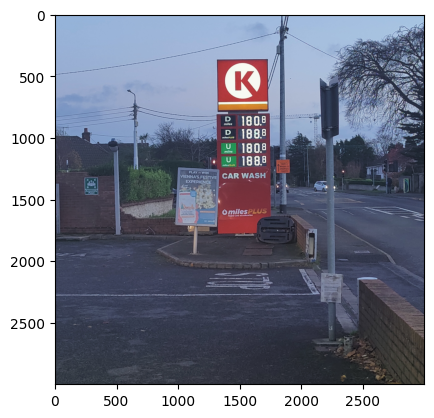

In [9]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract.exe'

I = cv.imread("rochestown191123.jpg")

oh, ow,od = I.shape

crop_i = int(oh * 0.25)
crop_j = int(ow * 0.3)

cropped = I[crop_i:ow-crop_i, crop_j:oh - crop_j]

ch, cw, cd = cropped.shape

cropped = cv.resize(cropped, dsize=(int(cw / 2), int(oh / 4)))

HSV = cv.cvtColor(cropped, cv.COLOR_BGR2HSV)

HSV = cv.GaussianBlur(HSV, (7, 7), 0)

lower_white = np.array([0, 0, 200])
upper_white = np.array([255, 10,255])

NewMask = cv.inRange(HSV, lower_white, upper_white)

shape = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10, 10))
shape2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

NewMask = cv.morphologyEx(NewMask, cv.MORPH_CLOSE, shape, iterations = 5)

NewMask = cv.dilate(NewMask, shape, iterations = 4)

ROI = cv.bitwise_and(cropped, cropped, mask=NewMask)

ROI_g = cv.cvtColor(ROI, cv.COLOR_BGR2GRAY)

contours, hierarchy = cv.findContours(ROI_g, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

ROI_not = cv.bitwise_not(ROI_g)

ROI_mask = cv.inRange(ROI_not, 240, 255)


im2 = cropped.copy()


file = open("test2.txt", "w+")
file.write("")
file.close()

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)

    buffer = 10

    # Drawing a rectangle on copied image - evaluation
    rect = cv.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Cropping the text block for giving input to OCR
    text_crop = ROI_not[y:y + h, x:x + w]

    th, tw= text_crop.shape

    file = open("test2.txt", "a", encoding='utf-8')

    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(text_crop, config='digits')

    #Process text taken from image
    numbers = text.split("\n")

    for number in numbers:

        target_index = numbers.index(number)

        if number == '':
            numbers.remove(number)
            continue

        if number.find(".") == -1:
            number = number[:3] + '.' + number[3:]
            numbers[target_index] = number



    result = "\n".join(numbers)

    # Appending the text into file
    file.write(result)
    file.write("\n")

    # Close the file
    file.close()

    

inputimg = cv.cvtColor(I, cv.COLOR_BGR2RGB)

plt.imshow(inputimg)
print(result)

cv.imwrite("example.jpg", im2) 
cv.imshow('Image', im2)
cv.waitKey(0)
cv.destroyAllWindows()